In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rpy2.robjects import r, pandas2ri
import rpy2

from rpy2.robjects.packages import importr

from scipy.stats import anderson
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
! pip install factor_analyzer==0.3.2

from factor_analyzer import FactorAnalyzer

**Exercício 9**

**a)** Realize uma análise fatorial do conjunto de dados considerando métodos de componentes principais e de máxima verossimilhança. Compare os resultados.

Utilizando o método dos componentes principais:

In [ ]:
df = pd.read_csv('MBA_CAR_ATTRIB.csv', delimiter = ";")
df

,IF_Estudante,ID_carro,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,Gostoso,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático
0,1001,5,3,5,5,1,3.0,4,5,1.0,3.0,5.0,3.0,5.0,3.0,1.0,4.0,3.0
1,1002,6,2,3,2,1,2.0,1,2,2.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,4.0
2,1003,7,3,5,4,1,4.0,4,4,1.0,3.0,5.0,3.0,NaN,4.0,2.0,4.0,3.0
3,1004,8,3,2,3,1,2.0,3,3,1.0,3.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0
4,1005,9,5,4,4,2,3.0,5,3,3.0,5.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1299,3,2,4,4,1,4.0,4,4,1.0,3.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
299,1300,4,5,4,3,5,4.0,4,3,5.0,5.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0
300,1301,5,4,4,3,2,2.0,4,4,1.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0,1.0
301,1302,6,1,3,1,2,2.0,1,3,1.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,5.0


In [ ]:
X = df.iloc[:, 2:18]
X

,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,Gostoso,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático
0,3,5,5,1,3.0,4,5,1.0,3.0,5.0,3.0,5.0,3.0,1.0,4.0,3.0
1,2,3,2,1,2.0,1,2,2.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,4.0
2,3,5,4,1,4.0,4,4,1.0,3.0,5.0,3.0,NaN,4.0,2.0,4.0,3.0
3,3,2,3,1,2.0,3,3,1.0,3.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0
4,5,4,4,2,3.0,5,3,3.0,5.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,4,4,1,4.0,4,4,1.0,3.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
299,5,4,3,5,4.0,4,3,5.0,5.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0
300,4,4,3,2,2.0,4,4,1.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0,1.0
301,1,3,1,2,2.0,1,3,1.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,5.0


In [ ]:
# Desenvolvendo uma análise fatorial.
fa = FactorAnalyzer(n_factors=25, rotation='varimax')
fa.fit(X)

# Retornando os autovalores.
ev, v = fa.get_eigenvalues()
ev

array([5.89203377, 3.17974523, 2.5372071 , 0.65046532, 0.58659977,
       0.47672335, 0.40555529, 0.37774255, 0.34826448, 0.29728346,
       0.28004281, 0.24883218, 0.2086758 , 0.18844181, 0.17693499,
       0.1454521 ])

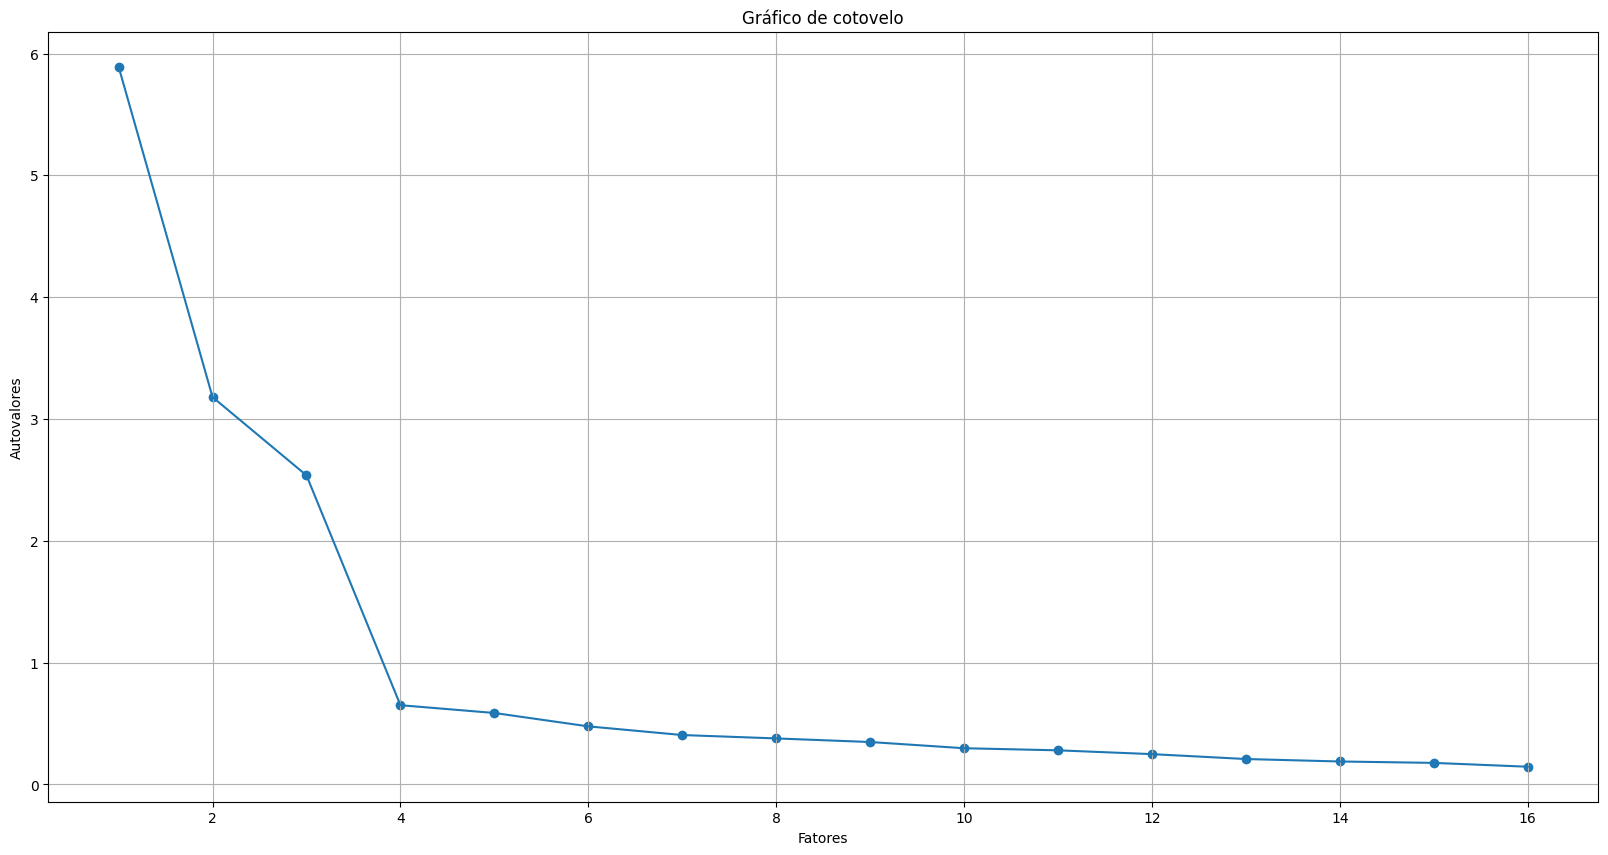

In [ ]:
# Gráfico de cotovelo para obter o número ideal de componentes principais, com base nos resultados observados.

plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Gráfico de cotovelo')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')

plt.grid()
plt.show()

Com base no gráfico acima, selecionaremos três fatores para nossa análise fatorial.

Utilizando o método da máxima verossimilhança:

In [ ]:
# Realizando um teste de normalidade para os dados.

# H0: os dados seguem uma distribuição normal multivariada.
# H1: os dados não seguem uma distribuição normal multivariada.

# Utilizando o StandardScaler para padronizar os dados.
scaler = StandardScaler()
data = scaler.fit_transform(df)

# Utilizando um teste Anderson-Darling para cada variável.
results = []
for col in data.T:  # Transpondo os dados para permitir as iterações.
    result = anderson(col)
    results.append((result.statistic, result.critical_values, result.significance_level))

# Interpretando os resultados.
for i, (statistic, critical_values, significance_level) in enumerate(results):
    if statistic > critical_values[2]:
        print(f"A variável {i + 1} não segue uma distribuição normal , portanto, rejeitamos H0.")
    else:
        print(f"A variável {i + 1} segue uma distribuição normal, portanto, não rejeitamos H0.")

A variável 1 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 2 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 3 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 4 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 5 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 6 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 7 segue uma distribuição normal, portanto, não rejeitamos H0.
A variável 8 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 9 não segue uma distribuição normal , portanto, rejeitamos H0.
A variável 10 segue uma distribuição normal, portanto, não rejeitamos H0.
A variável 11 segue uma distribuição normal, portanto, não rejeitamos H0.
A variável 12 segue uma distribuição normal, portanto, não rejeitamos H0.
A variável 13 segue uma distribuição normal, portanto, não rejeitamos H0.
A variável 14 segue uma distribuição no

Como pelo menos uma variável não segue uma distribuição normal, temos que o método da máxima verossimilhança não pode ser aplicado.

**Conclusão:** não é possível determinar a qualidade da análise fatorial, uma vez que o modelo utilizado para comparação não poderá ser aplicado.

Para a análise de fatores, utilizaremos 3 fatores mais significativos.

**b)** Salve os escores fatoriais e esquematize os escores fatoriais médios para cada um dos 10 carros avaliados pelos estudantes. O que o gráfico diz sobre as semelhanças e as diferenças entre os modelos?

In [ ]:
# Análise Fatorial com fatores não rotacionados
fa = FactorAnalyzer(n_factors= 3, rotation=None)
fa.fit(X)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [ ]:
# Mostrando a matriz de cargas fatoriais
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1','FA2','FA3']
L

,FA1,FA2,FA3
Excitante,0.857835,0.006936,0.201668
Confiável,0.124248,0.517633,-0.392779
Luxuoso,0.634092,0.247437,-0.454374
PróprioParaOArLivre,0.036544,0.424620,0.752419
Poderoso,0.689404,0.290909,0.182009
Estiloso,0.869482,0.102765,-0.073188
Confortável,0.146273,0.625449,-0.373526
Vigoroso,0.051272,0.469539,0.716829
Gostoso,0.857630,0.064126,0.146217
Seguro,-0.072110,0.678970,-0.366455


Estiloso, Seguro e Próprio para o ar livre apresentaram a maior significância na análise fatorial.

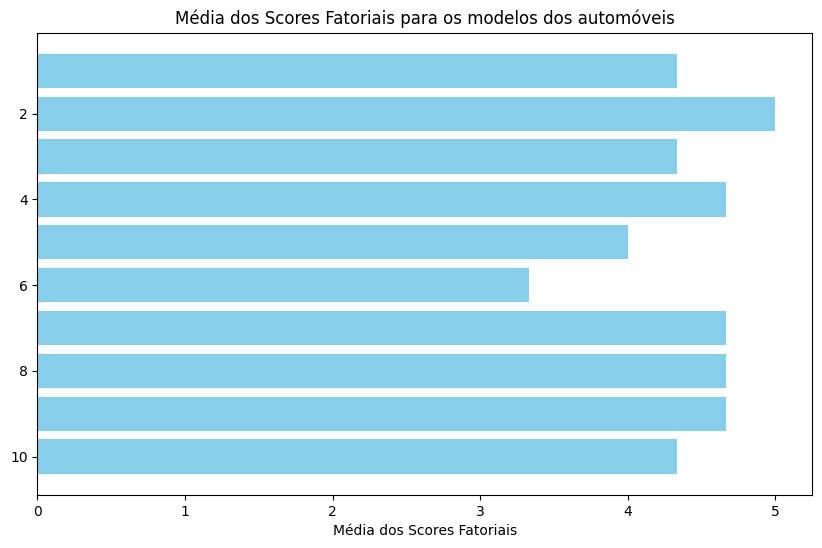

In [ ]:
# Calculando a Média dos Scores Fatoriais.
df['Média_dos_Scores_Fatoriais'] = df[['Estiloso', 'Seguro', 'PróprioParaOArLivre']].mean(axis=1)

# Ordenando o DataFrame pela Média decrescente dos Scores Fatoriais.
df = df.sort_values(by='Média_dos_Scores_Fatoriais', ascending=False)

# Construindo um gráfico de barras.
plt.figure(figsize=(10, 6))
plt.barh(df['ID_carro'], df['Média_dos_Scores_Fatoriais'], color='skyblue')
plt.xlabel('Média dos Scores Fatoriais')
plt.title('Média dos Scores Fatoriais para os modelos dos automóveis')
plt.gca().invert_yaxis()  # Invertendo o eixo y para a melhor análise.

# Plotando o resultado.
plt.show()

Pela análise do gráfico, concluímos que o Ford Explorer foi o que mais se destacou dentre os modelos pesquisados.